<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 1. 파이토치의 기본**

In [6]:
# 파이토치의 전반적인 구성
# torch: 메인 네임스페이스로 텐서 등의 다양한 수학 함수가 이 패키지에 포함돼 있다.
# torch.autograd: 자동 미분을 위한 함수가 포함돼 있다.
# torch.nn: 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의돼 있다.
# torch.optim: 확률적 경사 하강법(SGD)을 중심으로 한 파라미터 최적화 알고리즘이 구현돼 있다.
# torch.utils.data: SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수 포함.
# torch.onnx: Open Neural Network Exchange 포맷으로 모델을 export할 때 사용.
# - ONNX: 서로 다른 딥러닝 프레임워크 간에 모델을 공유할 때 사용하는 새로운 포맷.

In [7]:
# torch: 다차원 배열을 처리하기 위한 데이터 구조.
# 32비트의 유동 소수점은 torch.FloatTensor, 64비트의 부호 있는 정수라면 torch.LongTensor
# 어떤 형의 텐서이건 torch.tensor라는 함수로 작성할 수 있다.

**텐서 생성**

In [8]:
import numpy as np
import torch

# 중첩 list를 작성
t1=torch.tensor([[1,2],[3,4]])

# dtype를 사용해 데이터 형을 지정하여 텐서를 만들 수 있다.
t2=torch.tensor([[1,2,],[3,4]],dtype=torch.float64)

# 0부터 9까지 사용해 데이터 형을 지정하여 텐서를 만들 수 있다.
t3=torch.arange(0,10)

# 정규 난수로 100x10의 텐서를 작성
t4=torch.randn(100,10)

# 텐서의 shape은 size 메서드로 확인 가능
t4.size()

torch.Size([100, 10])

In [9]:
print('t1값:',t1)
print('t2값:',t2)
print('t3값:',t3)

t1값: tensor([[1, 2],
        [3, 4]])
t2값: tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
t3값: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


**텐서 변환**

In [10]:
t=torch.tensor([[1,2],[3,4]])
x=t.numpy() # numpy 메서드를 사용해 ndarray로 변환.

# GPU 상의 텐서는 to 메서드로, CPU의 텐서로 이동할 필요가 있다.
# t=torch.tensor([[1,2,],[3,4]],device="cuda:0")
x=t.to("cpu").numpy()
# GPU 상의 텐서는 그대로 변환할 수 없으며, CPU로 이동 후에 변환해야 한다.

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


**텐서의 인덱스 조작**

In [12]:
# 배열 A[i,j]=i,j를 첨자 인덱스라고 하며,
# 이 값을 지정해서 배열의 값을 가져오거나 변경하는 것을 '인덱스 조작'이라고 한다.
t=torch.tensor([[1,2,3,],[4,5,6]])

# 스칼라 첨자 지정
print('t[0,2]값:',t[0,2])

# 리스트로 지정
print('t[:,[1,2]]값:',t[:,[1,2]])

# 슬라이스로 지정
print('t[:,:2]값:',t[:,:2])

# 마스크 배열을 사용해서 3보다 큰 부분만 선택
print('t[t>3값:]',t[t>3])

# [0,1]의 요소를 100으로 설정
t[0,1]=100
print('t값:',t)

# 마스크 배열
# 원 배열과 크기는 같으면서 각 요소가 True/False로 설정돼 있는 배열.
# ex) a=[1,2,3]라는 배열에서 a>2를 실행하면, [False, Flase, True]라는 마스크 배열 생성.

t[0,2]값: tensor(3)
t[:,[1,2]]값: tensor([[2, 3],
        [5, 6]])
t[:,:2]값: tensor([[1, 2],
        [4, 5]])
t[t>3값:] tensor([4, 5, 6])
t값: tensor([[  1, 100,   3],
        [  4,   5,   6]])


**텐서 연산**

In [13]:
# 사칙 연산은 텐서 간이나 텐서와 파이썬의 스칼라 값 간에만 가능하다.
# 텐서와 ndarray간 연산은 지원하지 않으니 주의하자.

# 사칙 연산은 브로드캐스트가 적용돼서 두 개의 서로 다른 차원의 벡터와 스칼라 또는 행렬과 벡터 간의 연산 시
# 결과값의 차원은 두 차원 중 큰 차원을 따르는 차원 보간이 이루어진다.

v=torch.tensor([1,2,3])
w=torch.tensor([0,10,20])

# 2x3의 행렬
m=torch.tensor([[0,1,2],[100,200,300]])

# 행렬과 스칼라
m2=m*2
print('m2값:',m2)

# 행렬과 벡터
m3= m+v
print('m3값:',m3)

# 행렬 간 처리
m4= m+m
print('m4값:',m4)

m2값: tensor([[  0,   2,   4],
        [200, 400, 600]])
m3값: tensor([[  1,   3,   5],
        [101, 202, 303]])
m4값: tensor([[  0,   2,   4],
        [200, 400, 600]])


**수학 함수**

In [14]:
# 100x10의 테스트 데이터 생성
x=torch.randn(100,10)

# 수학 함수를 포함하는 식
y=x*2+torch.abs(x)

# 평균치 구하기
m=torch.mean(x)
print('m값:',m)

# 함수가 아닌 메서드로 사용할 수 있다.
m=x.mean()
print('m값:',m)

# 집계 결과는 0차원의 텐서로 item 메서드를 사용해서 값을 추출할 수 있다.
m_value=m.item()
print('m_value값:',m_value)

# 집계는 차원을 지정할 수도 있다. 다음은 행 방향으로 집계해서, 열 단위로 평균 값을 계산한다.
m2=x.mean(0)
print('m2값:',m2)

m값: tensor(0.0078)
m값: tensor(0.0078)
m_value값: 0.007774970028549433
m2값: tensor([-0.0885,  0.0976, -0.0817,  0.1083,  0.0361, -0.0144, -0.0415, -0.0363,
         0.0472,  0.0510])


In [15]:
# cat: 다른 길이의 복수의 텐서를 하나로 묶을 때 사용
# transpose: 행렬의 전치 외에도 이미지 데이터의 형식을 HWC 순으로 CHW 순으로 변경할 때도 사용.
# view: ndarry의 reshape 함수와 동일.

**텐서의 인덱스 조작**

In [16]:
x1=torch.tensor([[1,2,],[3,4]])
print('x1.view(4,1):',x1.view(4,1)) # 2x2를 4x1로 보여준다.

x2=torch.tensor([[10,20,30],[40,50,60]])
print('x2.view(1,-1):',x2.view(1,-1)) # -1을 사용하면 자동으로 4가 된다.

# 2x3을 전치해서 3x2로 만든다.
print('x2.t():',x2.t())

# dim=1로 결합하면, 2x5의 텐서를 만든다.
torch.cat([x1, x2], dim=1)

# HWC을 CHW로 변환
hwc_img_data=torch.rand(100,64,32,3)
chw_img_data=hwc_img_data.transpose(1,2).transpose(1,3)

print('hwc_img_data.size():',hwc_img_data.size())
print('chw_img_data.size():',chw_img_data.size())

x1.view(4,1): tensor([[1],
        [2],
        [3],
        [4]])
x2.view(1,-1): tensor([[10, 20, 30, 40, 50, 60]])
x2.t(): tensor([[10, 40],
        [20, 50],
        [30, 60]])
hwc_img_data.size(): torch.Size([100, 64, 32, 3])
chw_img_data.size(): torch.Size([100, 3, 64, 32])


In [17]:
# 선형 대수의 연산자
# dot: 벡터 내적
# matmul: 인수의 종류에 따라 자동으로 dot, mv, mm을 선택해서 실행
# svd: 특이값 분해
# eig, symeig: 고유값 분해
# mv: 행렬과 벡터의 곱
# mm: 행렬과 행렬의 곱

In [18]:
m=torch.randn(100,10)
v=torch.randn(10)

# 내적
d=torch.dot(v,v)
print('d값:',d)

# 100x10의 행렬과 길이 10인 벡터의 곱
m1=torch.tensor([[1,2,],[3,4]])
m2=torch.tensor([[10,20]])

print('m1.size()값:',m1.size())
print('m2.size()값:',m2.size())

v2=torch.mv(m,v)
v3=torch.mm(m1.t(), m1)

print('v2값:',v2)
print('v2.size():',v2.size())
print('v3값:',v3)

d값: tensor(12.4236)
m1.size()값: torch.Size([2, 2])
m2.size()값: torch.Size([1, 2])
v2값: tensor([ 5.8179e-01, -1.6911e+00,  6.2648e+00, -6.1095e+00, -3.2899e+00,
         3.6259e+00,  3.6211e+00, -8.1792e-01,  2.4657e+00,  1.5965e+00,
        -6.1809e-01, -4.6763e+00,  1.3105e+00,  2.4366e+00, -4.1512e+00,
         2.0315e+00, -3.5981e+00,  1.2513e+00,  1.1471e+00, -2.0539e+00,
         6.4952e+00,  4.1630e+00,  2.4528e+00, -1.4910e+00,  5.2668e+00,
        -2.2573e+00, -6.8787e+00,  4.0618e+00,  5.3500e-01,  3.2897e+00,
        -4.0065e+00,  2.1908e+00, -6.6115e+00, -1.0994e+00,  2.4405e+00,
         2.7266e+00,  6.0466e-01, -9.1214e-01,  1.8477e-01,  3.5648e+00,
        -2.7593e+00, -5.0157e+00,  5.7970e+00, -7.9235e+00,  2.7075e-01,
        -3.1519e-01, -9.9454e+00, -5.3122e+00, -3.6068e+00,  4.9369e+00,
         3.5242e+00, -1.6345e+00,  5.6232e+00,  6.3599e+00, -4.2066e+00,
         1.3742e-01, -2.4953e+00, -3.4879e+00,  2.4518e+00, -3.2594e+00,
        -2.3940e+00, -1.4794e+00,  8.

In [24]:
# 내적
x1=torch.tensor([[1,2],[3,4]])
x2=torch.tensor([3,4])
x3=torch.dot(x2,x2)
print('x3값:',x3)

x3값: tensor(25)


In [26]:
# 벡터의 곱
v2=torch.mv(x1,x2)
print('v2값:',v2)

v2값: tensor([11, 25])


In [28]:
# 행렬곱
x3=torch.mm(x1.t(),x1)
print('x3값:',x3)

x3값: tensor([[10, 14],
        [14, 20]])


**텐서와 자동 미분**

In [31]:
import torch
x=torch.randn(100,3)
a=torch.tensor([1,2,3.],requires_grad=True) # 미분의 변수로 사용하는 경우

y=torch.mv(x,a)
o=y.sum()

# 미분을 실행
o.backward()

# 분석 답과 비교
a.grad !=x.sum(0)

print('a.grad값:',a.grad)
print('x.sum(0)값:',x.sum(0))

a.grad값: tensor([ 0.9876,  1.8254, -8.3118])
x.sum(0)값: tensor([ 0.9876,  1.8254, -8.3118])


In [32]:
a.grad !=x.sum(0)

tensor([True, True, True])

In [35]:
import torch
x=torch.randn([3,3])
print('x값:',x)
a=torch.tensor([1,2,3.],requires_grad=True) # 미분의 변수로 사용하는 경우

y=torch.mv(x,a)
print('y값:',y)
o=y.sum()
print('o값:',o)

# 미분을 실행
o.backward()

# 분석 답과 비교
a.grad !=x.sum(0)

print('a.grad값:',a.grad)
print('x.sum(0)값:',x.sum(0))

x값: tensor([[ 0.9517,  0.8344, -0.3484],
        [-0.4439, -0.5219,  0.9792],
        [-1.6205, -0.1255,  0.4270]])
y값: tensor([ 1.5752,  1.4499, -0.5903], grad_fn=<MvBackward0>)
o값: tensor(2.4348, grad_fn=<SumBackward0>)
a.grad값: tensor([-1.1127,  0.1870,  1.0578])
x.sum(0)값: tensor([-1.1127,  0.1870,  1.0578])


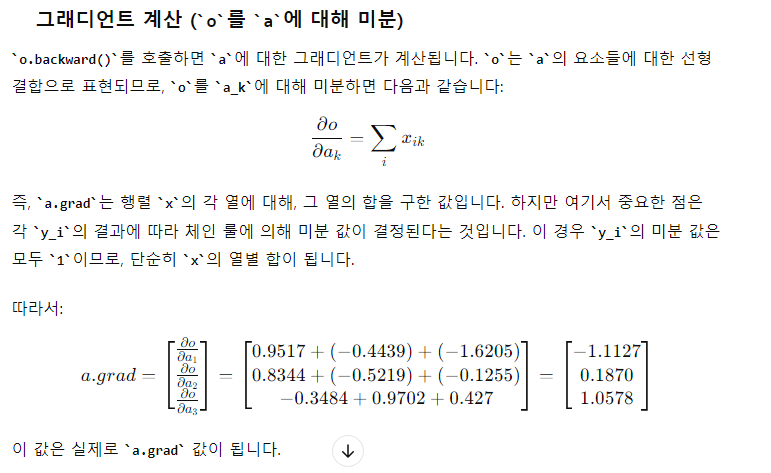

In [37]:
# 간단한 예에서는 자동 미분의 장점을 느끼기 어려울 수도 있지만,
# 신경망처럼 복잡한 함수에서 미분의 체인 규칙이 연속되는 경우에는 매우 중요한 역할을 한다.

In [ ]:
# 텐서는 Numpy의 ndarray와 똑같은 방식으로 사용할 수 있는 다차원 배열로
# GPU를 사용한 계산도 지원하고 있어서 규모가 큰 행렬의 연산 등에 그 위력을 발휘한다.

# 텐서는 자동으로 미분을 계산할 수 있어서 신경망 최적화에 중요한 역할을 한다.